In [4]:
# YouTube Data Analysis Project

In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [6]:
# Load US comments dataset
print("Loading comments data...")
comments = pd.read_csv('data/UScomments.csv', on_bad_lines='skip')
print(f"Comments dataset loaded: {comments.shape[0]} comments")
print(f"Columns: {list(comments.columns)}")
comments.head()

Loading comments data...
Comments dataset loaded: 691400 comments
Columns: ['video_id', 'comment_text', 'likes', 'replies']


,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [7]:
# Check for missing values
print("Missing values in comments dataset:")
print(comments.isnull().sum())

# Drop missing values
comments.dropna(inplace=True)
print(f"\nAfter cleaning: {comments.shape[0]} comments")

# Display sample data
comments.head()

Missing values in comments dataset:
video_id         0
comment_text    26
likes            0
replies          0
dtype: int64

After cleaning: 691374 comments


,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [8]:
# Install and import TextBlob for sentiment analysis
try:
    from textblob import TextBlob
    print("TextBlob imported successfully")
except ImportError:
    print("Installing TextBlob...")
    !pip install textblob
    from textblob import TextBlob

# Test sentiment analysis
test_comment = "This video is amazing! Love it!"
polarity = TextBlob(test_comment).sentiment.polarity
print(f"Test comment: '{test_comment}'")
print(f"Sentiment polarity: {polarity}")

TextBlob imported successfully
Test comment: 'This video is amazing! Love it!'
Sentiment polarity: 0.6875


In [9]:
# Perform sentiment analysis on all comments
print("Performing sentiment analysis...")
print("This may take several minutes...")

polarity_scores = []
for i, comment in enumerate(comments['comment_text']):
    if i % 50000 == 0:
        print(f"Processed {i} comments...")
    try:
        polarity_scores.append(TextBlob(str(comment)).sentiment.polarity)
    except:
        polarity_scores.append(0)

# Add polarity scores to dataframe
comments['polarity'] = polarity_scores
print(f"Sentiment analysis completed for {len(polarity_scores)} comments")

Performing sentiment analysis...
This may take several minutes...
Processed 0 comments...
Processed 50000 comments...
Processed 100000 comments...
Processed 150000 comments...
Processed 200000 comments...
Processed 250000 comments...
Processed 300000 comments...
Processed 350000 comments...
Processed 400000 comments...
Processed 450000 comments...
Processed 500000 comments...
Processed 550000 comments...
Processed 600000 comments...
Processed 650000 comments...
Sentiment analysis completed for 691374 comments


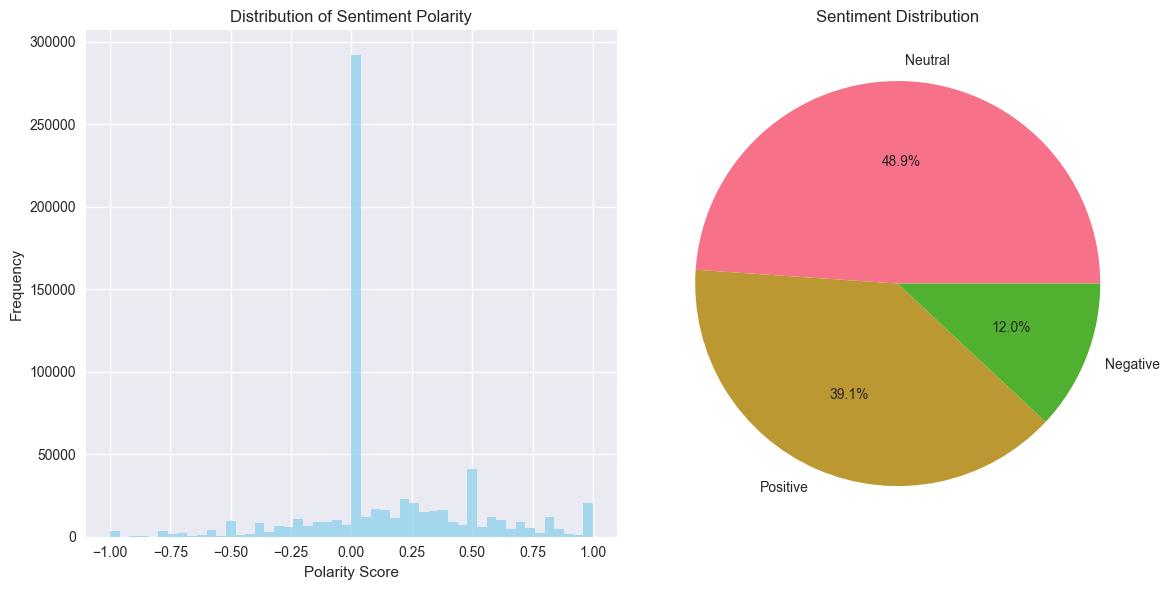

Sentiment Analysis Summary:
Positive comments: 269074
Neutral comments: 339613
Negative comments: 82687


In [10]:
# Analyze sentiment distribution
plt.figure(figsize=(12, 6))

# Plot 1: Polarity distribution
plt.subplot(1, 2, 1)
plt.hist(comments['polarity'], bins=50, alpha=0.7, color='skyblue')
plt.title('Distribution of Sentiment Polarity')
plt.xlabel('Polarity Score')
plt.ylabel('Frequency')

# Plot 2: Sentiment categories
plt.subplot(1, 2, 2)
sentiment_categories = pd.cut(comments['polarity'], 
                             bins=[-1, -0.1, 0.1, 1], 
                             labels=['Negative', 'Neutral', 'Positive'])
sentiment_counts = sentiment_categories.value_counts()
plt.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%')
plt.title('Sentiment Distribution')

plt.tight_layout()
plt.show()

print("Sentiment Analysis Summary:")
print(f"Positive comments: {len(comments[comments['polarity'] > 0.1])}")
print(f"Neutral comments: {len(comments[(comments['polarity'] >= -0.1) & (comments['polarity'] <= 0.1)])}")
print(f"Negative comments: {len(comments[comments['polarity'] < -0.1])}")

In [11]:
# Install wordcloud if needed
try:
    from wordcloud import WordCloud, STOPWORDS
    print("WordCloud imported successfully")
except ImportError:
    print("Installing WordCloud...")
    !pip install wordcloud
    from wordcloud import WordCloud, STOPWORDS

# Separate positive and negative comments
positive_comments = comments[comments['polarity'] > 0.1]
negative_comments = comments[comments['polarity'] < -0.1]

print(f"Positive comments: {len(positive_comments)}")
print(f"Negative comments: {len(negative_comments)}")

WordCloud imported successfully
Positive comments: 269074
Negative comments: 82687


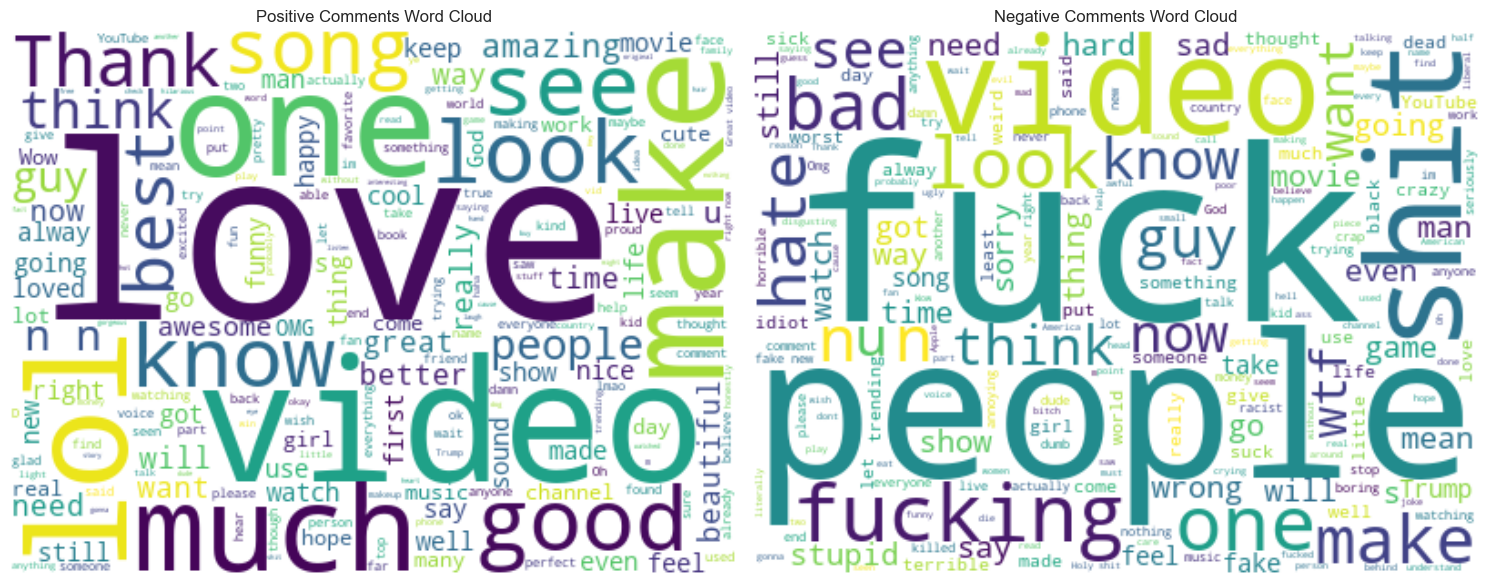

In [13]:
# Generate word clouds
plt.figure(figsize=(15, 6))

# Positive comments word cloud
plt.subplot(1, 2, 1)
if len(positive_comments) > 0:
    positive_text = ' '.join(positive_comments['comment_text'].astype(str))
    wordcloud_positive = WordCloud(stopwords=set(STOPWORDS), 
                                 width=400, height=300, 
                                 background_color='white').generate(positive_text)
    plt.imshow(wordcloud_positive, interpolation='bilinear')
    plt.title('Positive Comments Word Cloud')
    plt.axis('off')

# Negative comments word cloud
plt.subplot(1, 2, 2)
if len(negative_comments) > 0:
    negative_text = ' '.join(negative_comments['comment_text'].astype(str))
    wordcloud_negative = WordCloud(stopwords=set(STOPWORDS), 
                                 width=400, height=300, 
                                 background_color='white').generate(negative_text)
    plt.imshow(wordcloud_negative, interpolation='bilinear')
    plt.title('Negative Comments Word Cloud')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [14]:
# Install emoji library
try:
    import emoji
    print("Emoji library imported successfully")
except ImportError:
    print("Installing emoji library...")
    !pip install emoji==2.2.0
    import emoji

# Extract emojis from comments
all_emojis = []
for comment in comments['comment_text'].dropna():
    for char in str(comment):
        if char in emoji.EMOJI_DATA:
            all_emojis.append(char)

print(f"Total emojis found: {len(all_emojis)}")

Emoji library imported successfully
Total emojis found: 294549


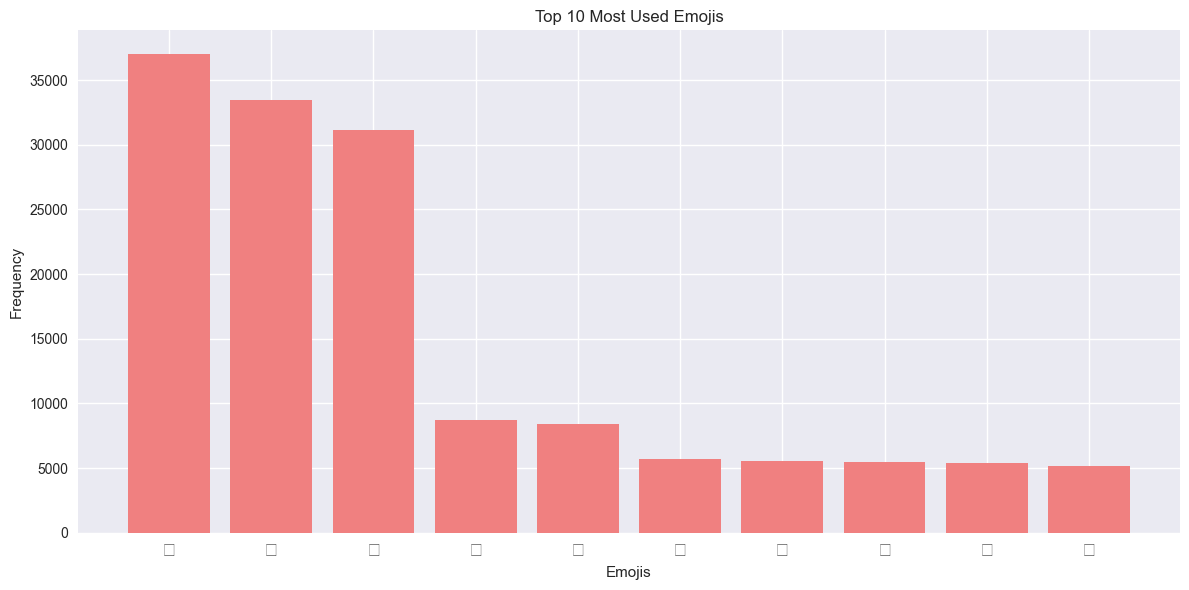

Top 10 Emojis:
1. 😂: 36987 times
2. 😍: 33453 times
3. ❤: 31119 times
4. 🔥: 8694 times
5. 😭: 8398 times
6. 👏: 5719 times
7. 😘: 5545 times
8. 👍: 5476 times
9. 💖: 5359 times
10. 💕: 5147 times


In [15]:
# Analyze emoji frequency
from collections import Counter

if len(all_emojis) > 0:
    emoji_counts = Counter(all_emojis).most_common(10)
    
    # Create emoji frequency plot
    emojis = [item[0] for item in emoji_counts]
    frequencies = [item[1] for item in emoji_counts]
    
    plt.figure(figsize=(12, 6))
    plt.bar(range(len(emojis)), frequencies, color='lightcoral')
    plt.title('Top 10 Most Used Emojis')
    plt.xlabel('Emojis')
    plt.ylabel('Frequency')
    plt.xticks(range(len(emojis)), emojis, fontsize=14)
    plt.tight_layout()
    plt.show()
    
    print("Top 10 Emojis:")
    for i, (emoji_char, freq) in enumerate(emoji_counts, 1):
        print(f"{i}. {emoji_char}: {freq} times")
else:
    print("No emojis found in the dataset")

In [16]:
# Load video data from multiple countries
import os

# Get list of CSV files
csv_files = [f for f in os.listdir('additional_data') if f.endswith('.csv')]
print(f"Found {len(csv_files)} video datasets: {csv_files}")

# Load and combine all video data
full_video_data = pd.DataFrame()

for file in csv_files:
    print(f"Loading {file}...")
    try:
        df = pd.read_csv(f'additional_data/{file}', encoding='iso-8859-1', on_bad_lines='skip')
        full_video_data = pd.concat([full_video_data, df], ignore_index=True)
    except Exception as e:
        print(f"Error loading {file}: {e}")

print(f"\nCombined video dataset: {full_video_data.shape}")
full_video_data.head()

Found 10 video datasets: ['CAvideos.csv', 'DEvideos.csv', 'FRvideos.csv', 'GBvideos.csv', 'INvideos.csv', 'JPvideos.csv', 'KRvideos.csv', 'MXvideos.csv', 'RUvideos.csv', 'USvideos.csv']
Loading CAvideos.csv...
Loading DEvideos.csv...
Loading FRvideos.csv...
Loading GBvideos.csv...
Loading INvideos.csv...
Loading JPvideos.csv...
Loading KRvideos.csv...
Loading MXvideos.csv...
Loading RUvideos.csv...
Loading USvideos.csv...

Combined video dataset: (375942, 16)


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...


In [17]:
# Clean video data
print("Cleaning video data...")

# Remove duplicates
initial_count = len(full_video_data)
full_video_data = full_video_data.drop_duplicates()
final_count = len(full_video_data)
print(f"Removed {initial_count - final_count} duplicate rows")

# Check for missing values
print("\nMissing values:")
print(full_video_data.isnull().sum())

# Display cleaned data info
print(f"\nFinal dataset shape: {full_video_data.shape}")
print(f"Columns: {list(full_video_data.columns)}")

Cleaning video data...
Removed 36417 duplicate rows

Missing values:
video_id                      0
trending_date                 0
title                         0
channel_title                 0
category_id                   0
publish_time                  0
tags                          0
views                         0
likes                         0
dislikes                      0
comment_count                 0
thumbnail_link                0
comments_disabled             0
ratings_disabled              0
video_error_or_removed        0
description               17977
dtype: int64

Final dataset shape: (339525, 16)
Columns: ['video_id', 'trending_date', 'title', 'channel_title', 'category_id', 'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed', 'description']


In [18]:
# Load category mapping
category_df = pd.read_json('additional_data/US_category_id.json')

# Create category dictionary
category_dict = {}
for item in category_df['items'].values:
    category_dict[int(item['id'])] = item['snippet']['title']

# Map categories to video data
full_video_data['category_name'] = full_video_data['category_id'].map(category_dict)

print("Category mapping completed")
print(f"Unique categories: {full_video_data['category_name'].nunique()}")
print(f"Category distribution:")
print(full_video_data['category_name'].value_counts().head(10))

Category mapping completed
Unique categories: 18
Category distribution:
category_name
Entertainment       97365
People & Blogs      50164
Music               36990
News & Politics     34599
Comedy              24024
Sports              21409
Film & Animation    18329
Howto & Style       17549
Gaming              10433
Education            7396
Name: count, dtype: int64


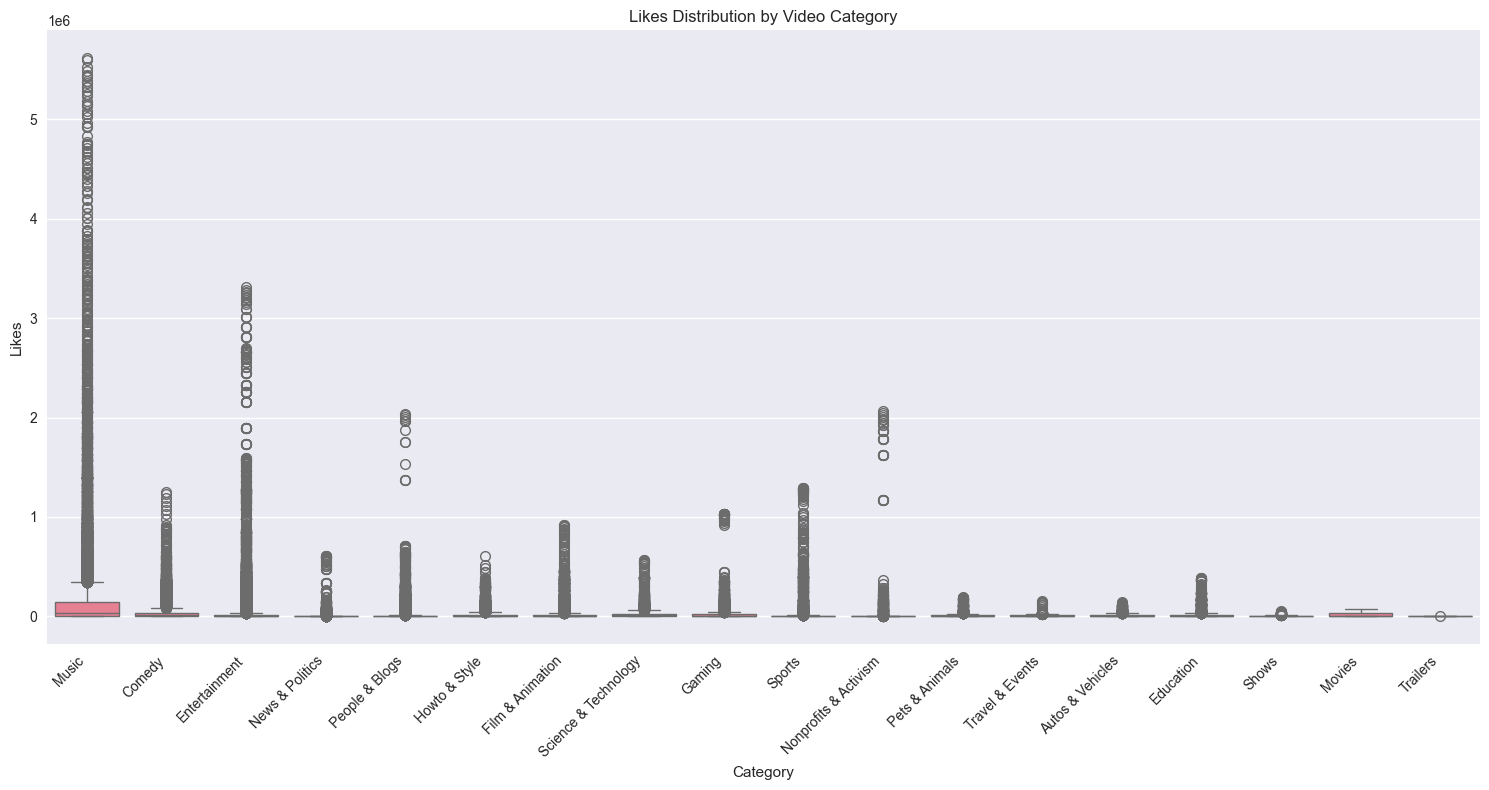

Top 10 Categories by Average Likes:
                                mean   median  count
category_name                                       
Music                  158632.773128  32675.5  36990
Comedy                  38771.413961  12120.0  24024
Nonprofits & Activism   30698.461425    497.5   2722
Science & Technology    27634.236190  10919.0   7350
Entertainment           24421.835927   2974.0  97365
Gaming                  24131.651011   5814.0  10433
Film & Animation        23875.349501   2925.0  18329
Movies                  19808.045455   1614.5     22
Howto & Style           17479.844151   4456.0  17549
Sports                  15426.165117   1861.0  21409


In [19]:
# Analyze category performance
plt.figure(figsize=(15, 8))

# Box plot of likes by category
sns.boxplot(x='category_name', y='likes', data=full_video_data)
plt.title('Likes Distribution by Video Category')
plt.xlabel('Category')
plt.ylabel('Likes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Top categories by average likes
category_performance = full_video_data.groupby('category_name')['likes'].agg(['mean', 'median', 'count']).sort_values('mean', ascending=False)
print("Top 10 Categories by Average Likes:")
print(category_performance.head(10))

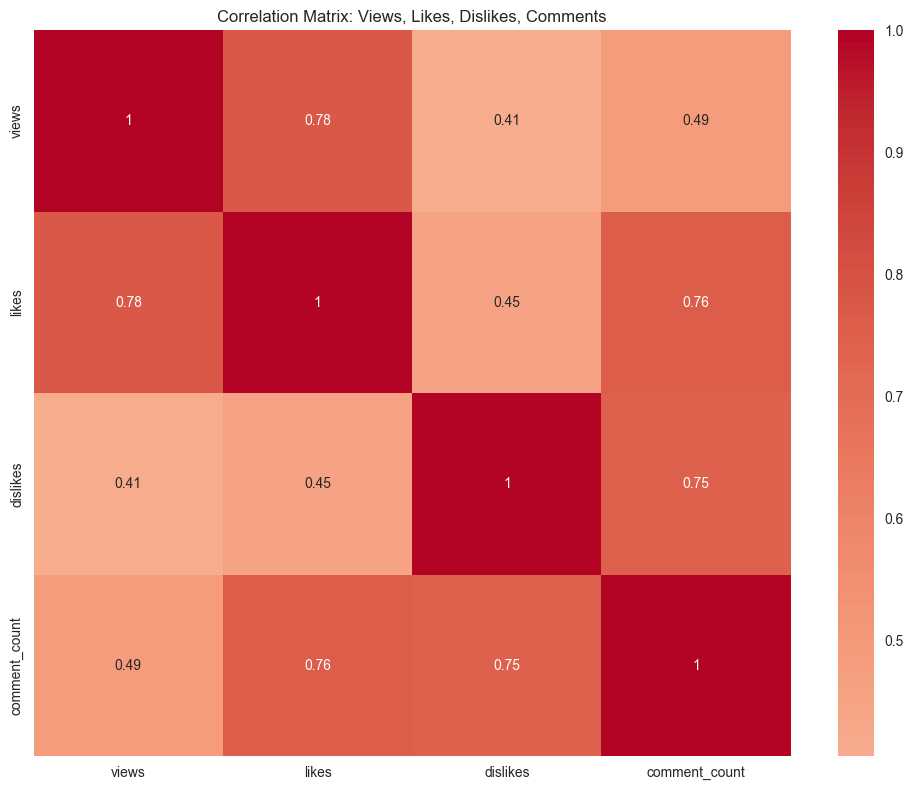

Engagement Metrics Summary:
Average like rate: 3.64%
Average dislike rate: 0.22%
Average comment rate: 0.57%


In [20]:
# Calculate engagement metrics
full_video_data['like_rate'] = (full_video_data['likes'] / full_video_data['views']) * 100
full_video_data['dislike_rate'] = (full_video_data['dislikes'] / full_video_data['views']) * 100
full_video_data['comment_rate'] = (full_video_data['comment_count'] / full_video_data['views']) * 100

# Correlation analysis
correlation_data = full_video_data[['views', 'likes', 'dislikes', 'comment_count']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_data, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix: Views, Likes, Dislikes, Comments')
plt.tight_layout()
plt.show()

print("Engagement Metrics Summary:")
print(f"Average like rate: {full_video_data['like_rate'].mean():.2f}%")
print(f"Average dislike rate: {full_video_data['dislike_rate'].mean():.2f}%")
print(f"Average comment rate: {full_video_data['comment_rate'].mean():.2f}%")

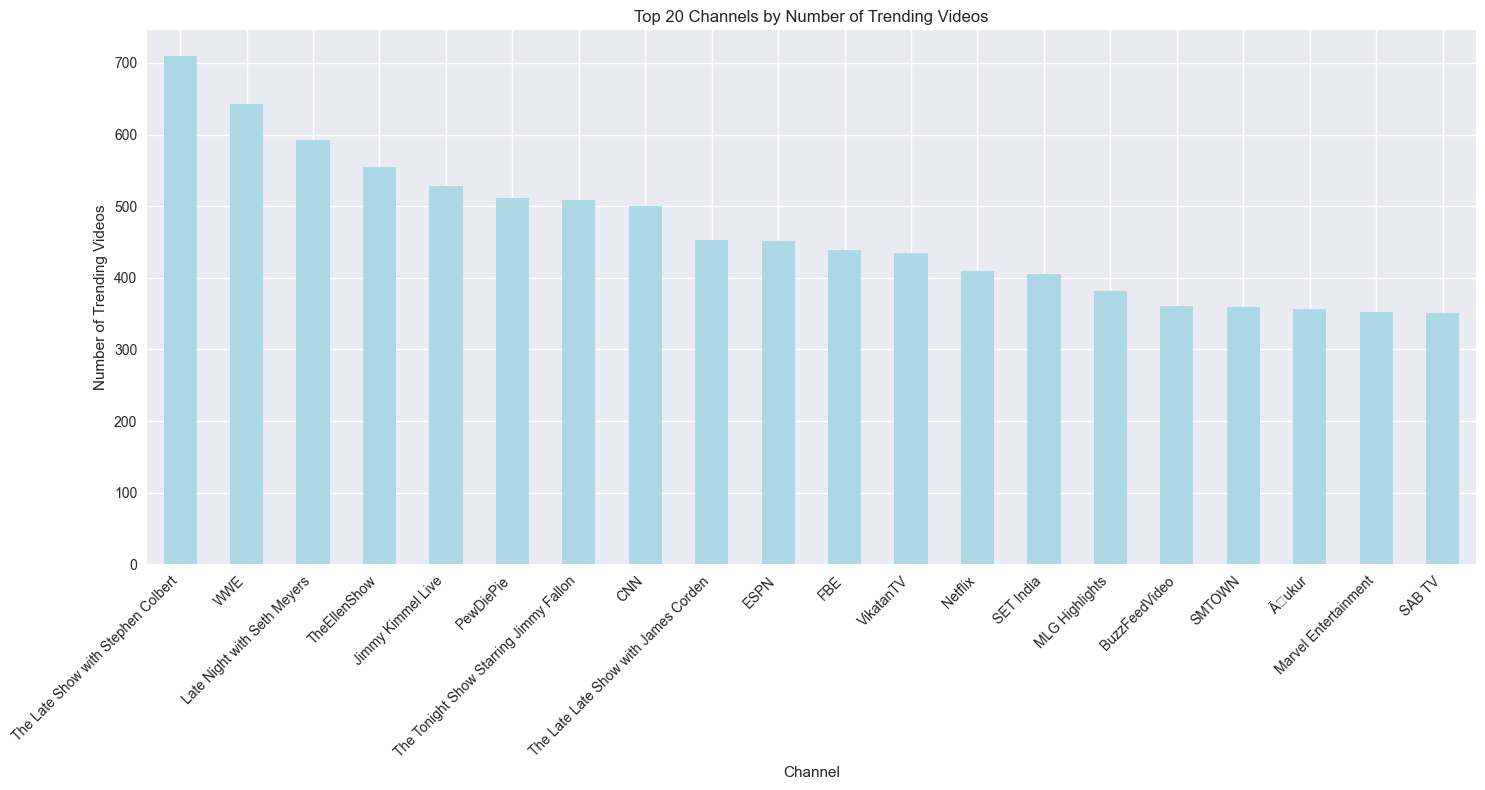

Top 10 Channels by Trending Videos:
channel_title
The Late Show with Stephen Colbert        710
WWE                                       643
Late Night with Seth Meyers               592
TheEllenShow                              555
Jimmy Kimmel Live                         528
PewDiePie                                 511
The Tonight Show Starring Jimmy Fallon    509
CNN                                       500
The Late Late Show with James Corden      453
ESPN                                      452
dtype: int64


In [21]:
# Analyze channel performance
channel_performance = full_video_data.groupby('channel_title').size().sort_values(ascending=False).head(20)

plt.figure(figsize=(15, 8))
channel_performance.plot(kind='bar', color='lightblue')
plt.title('Top 20 Channels by Number of Trending Videos')
plt.xlabel('Channel')
plt.ylabel('Number of Trending Videos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("Top 10 Channels by Trending Videos:")
print(channel_performance.head(10))

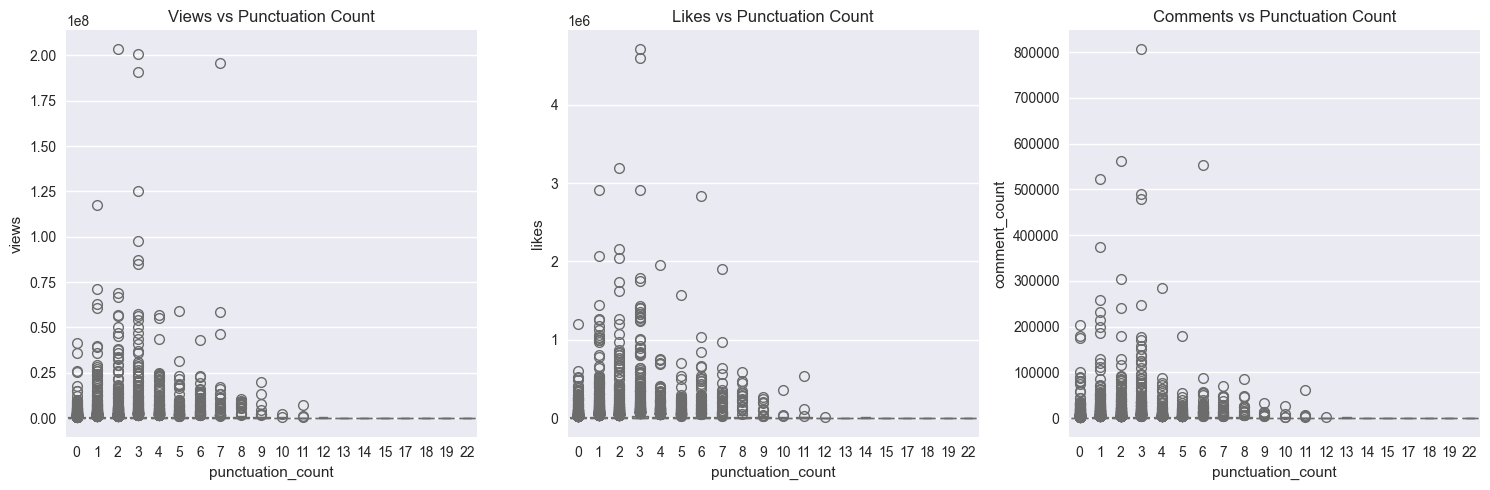

In [22]:
# Analyze title characteristics
import string

def count_punctuation(text):
    return len([char for char in str(text) if char in string.punctuation])

# Sample data for analysis (to avoid memory issues)
sample_data = full_video_data.sample(n=min(10000, len(full_video_data)))
sample_data['punctuation_count'] = sample_data['title'].apply(count_punctuation)

# Analyze relationship between punctuation and engagement
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x='punctuation_count', y='views', data=sample_data)
plt.title('Views vs Punctuation Count')

plt.subplot(1, 3, 2)
sns.boxplot(x='punctuation_count', y='likes', data=sample_data)
plt.title('Likes vs Punctuation Count')

plt.subplot(1, 3, 3)
sns.boxplot(x='punctuation_count', y='comment_count', data=sample_data)
plt.title('Comments vs Punctuation Count')

plt.tight_layout()
plt.show()

In [23]:
# Export processed data
print("Exporting processed data...")

# Export sample data
sample_export = full_video_data.sample(n=min(5000, len(full_video_data)))

# CSV export
sample_export.to_csv('exports/youtube_analysis_sample.csv', index=False)
print("✓ CSV exported: exports/youtube_analysis_sample.csv")

# JSON export
sample_export.to_json('exports/youtube_analysis_sample.json')
print("✓ JSON exported: exports/youtube_analysis_sample.json")

# SQLite export
from sqlalchemy import create_engine
engine = create_engine('sqlite:///exports/youtube_analysis_sample.sqlite')
sample_export.to_sql('youtube_data', con=engine, if_exists='replace')
print("✓ SQLite exported: exports/youtube_analysis_sample.sqlite")

print("\nData export completed successfully!")

Exporting processed data...
✓ CSV exported: exports/youtube_analysis_sample.csv
✓ JSON exported: exports/youtube_analysis_sample.json
✓ SQLite exported: exports/youtube_analysis_sample.sqlite

Data export completed successfully!


In [25]:
# Project Summary
print("="*60)
print("YOUTUBE DATA ANALYSIS PROJECT - SUMMARY")
print("="*60)

print(f"\n DATASET OVERVIEW:")
print(f"• Total Comments Analyzed: {len(comments):,}")
print(f"• Total Videos Analyzed: {len(full_video_data):,}")
print(f"• Countries Covered: {len(csv_files)}")
print(f"• Video Categories: {full_video_data['category_name'].nunique()}")

print(f"\n KEY INSIGHTS:")
print(f"• Average Sentiment Polarity: {comments['polarity'].mean():.3f}")
print(f"• Most Engaging Category: {category_performance.index[0]}")
print(f"• Top Trending Channel: {channel_performance.index[0]}")
print(f"• Average Like Rate: {full_video_data['like_rate'].mean():.2f}%")

print(f"\n ANALYSIS COMPLETED:")
print("✓ Sentiment Analysis")
print("✓ Word Cloud Generation")
print("✓ Emoji Usage Analysis")
print("✓ Category Performance Analysis")
print("✓ Channel Trending Analysis")
print("✓ Engagement Metrics Calculation")
print("✓ Content Characteristics Analysis")
print("✓ Data Export (CSV, JSON, SQLite)")

print(f"\n OUTPUT FILES:")
print("✓ exports/youtube_analysis_sample.csv")
print("✓ exports/youtube_analysis_sample.json")
print("✓ exports/youtube_analysis_sample.sqlite")

print("\n" + "="*60)
print("PROJECT COMPLETED SUCCESSFULLY!")
print("="*60)

YOUTUBE DATA ANALYSIS PROJECT - SUMMARY

 DATASET OVERVIEW:
• Total Comments Analyzed: 691,374
• Total Videos Analyzed: 339,525
• Countries Covered: 10
• Video Categories: 18

 KEY INSIGHTS:
• Average Sentiment Polarity: 0.138
• Most Engaging Category: Music
• Top Trending Channel: The Late Show with Stephen Colbert
• Average Like Rate: 3.64%

 ANALYSIS COMPLETED:
✓ Sentiment Analysis
✓ Word Cloud Generation
✓ Emoji Usage Analysis
✓ Category Performance Analysis
✓ Channel Trending Analysis
✓ Engagement Metrics Calculation
✓ Content Characteristics Analysis
✓ Data Export (CSV, JSON, SQLite)

 OUTPUT FILES:
✓ exports/youtube_analysis_sample.csv
✓ exports/youtube_analysis_sample.json
✓ exports/youtube_analysis_sample.sqlite

PROJECT COMPLETED SUCCESSFULLY!
